# Steps 

# Resources

# 1/Upload Dataset 

In [2]:
import pandas as pd
import os
print(os.listdir("../Black Friday"))
dataset=pd.read_csv('../Black Friday/BlackFriday.csv')
dataset=dataset [:10000]
print(dataset)

['.ipynb_checkpoints', '.~Black Friday 1.ipynb', 'Black Friday 1.ipynb', 'BlackFriday.csv']
      User_ID Product_ID Gender    Age  Occupation City_Category  \
0     1000001  P00069042      F   0-17          10             A   
1     1000001  P00248942      F   0-17          10             A   
2     1000001  P00087842      F   0-17          10             A   
3     1000001  P00085442      F   0-17          10             A   
4     1000002  P00285442      M    55+          16             C   
5     1000003  P00193542      M  26-35          15             A   
6     1000004  P00184942      M  46-50           7             B   
7     1000004  P00346142      M  46-50           7             B   
8     1000004   P0097242      M  46-50           7             B   
9     1000005  P00274942      M  26-35          20             A   
10    1000005  P00251242      M  26-35          20             A   
11    1000005  P00014542      M  26-35          20             A   
12    1000005  P00031342

In [3]:

new_dataset=dataset.drop([ 'User_ID', 'Product_ID'], axis=1)
print(new_dataset.head())

  Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969  


### 2/Data exploration

In [4]:
new_dataset.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,8.433700,0.405300,5.292800,9.796359,12.811144,9152.487700
std,6.660333,0.490975,3.660739,5.055550,4.057049,4881.543001
min,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,3.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8021.500000
75%,15.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [4]:
new_dataset.shape

(10000, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027548B3C780>,
      dtype=object)

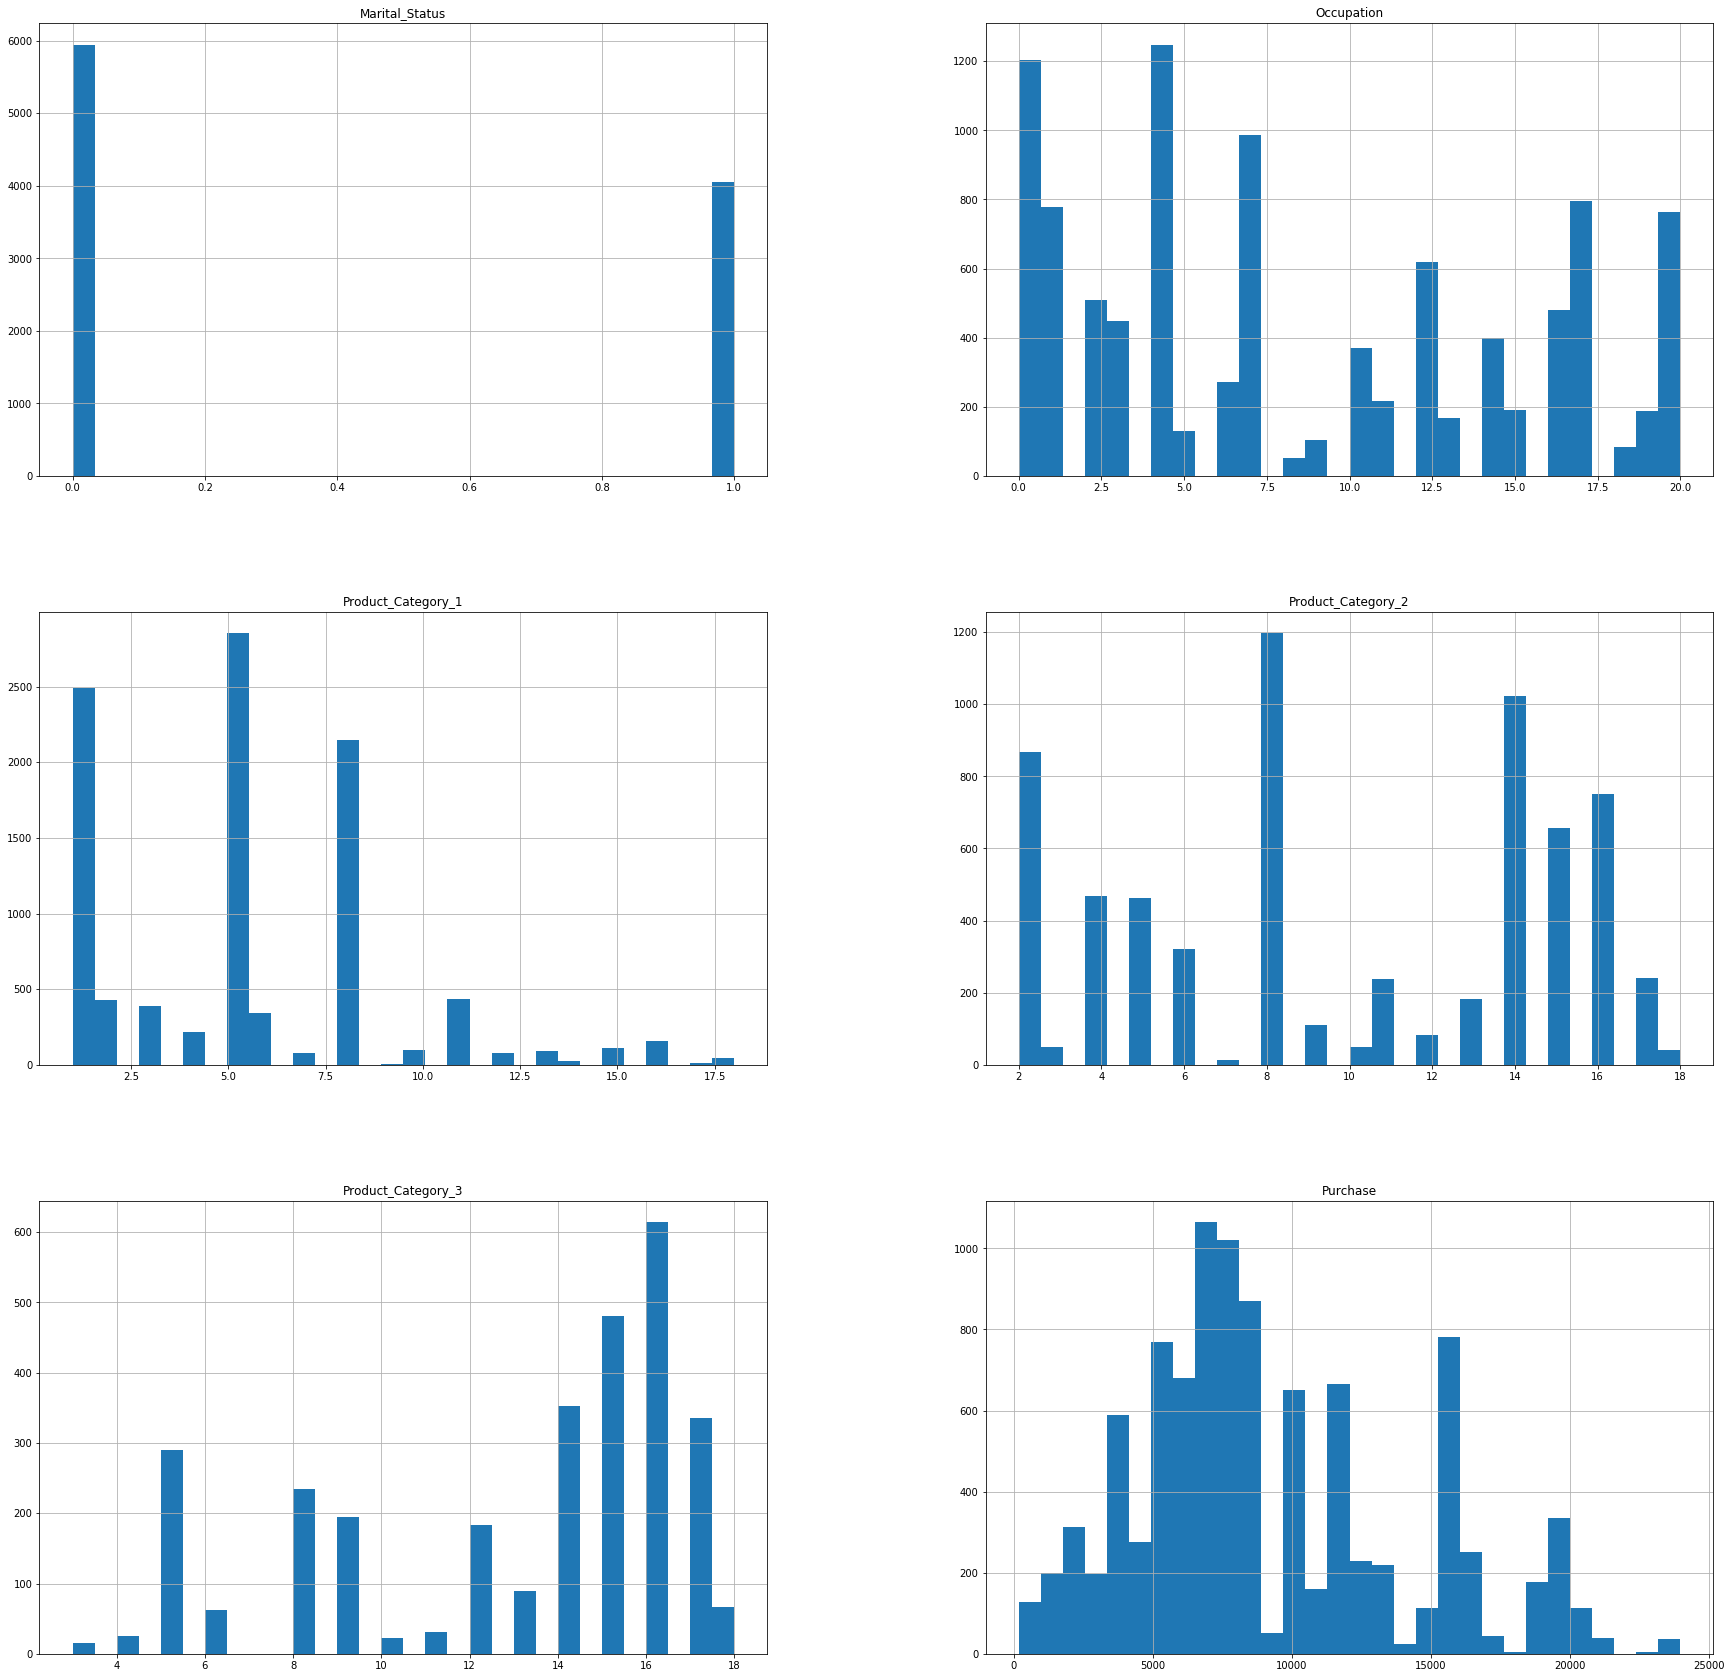

In [5]:
# Pretty display for notebooks
%matplotlib inline
import matplotlib.pyplot as plt
new_dataset.hist(bins=30,figsize=(30,30))

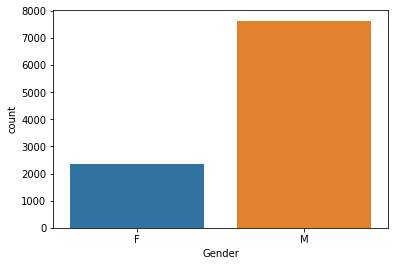

In [6]:

import seaborn as sns
sns.countplot(new_dataset['Gender'])

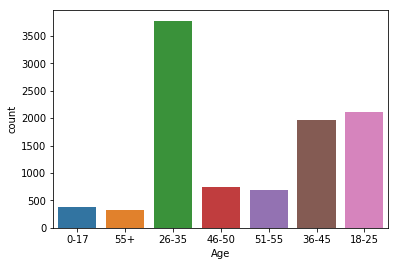

In [7]:
sns.countplot(new_dataset['Age'])

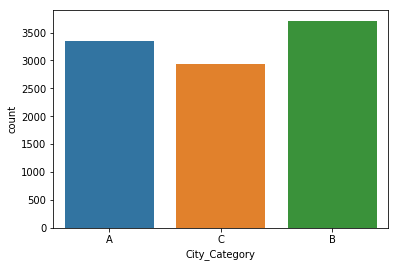

In [8]:
sns.countplot(new_dataset['City_Category'])

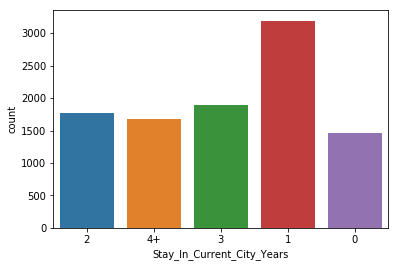

In [9]:
sns.countplot(new_dataset['Stay_In_Current_City_Years'])

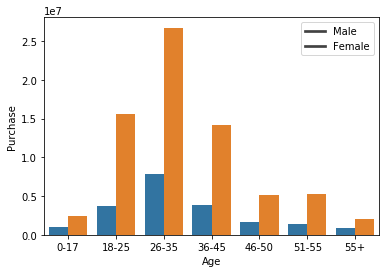

In [10]:
# age & purchase
import numpy as np
df= new_dataset.groupby(['Age','Gender'], as_index=False).agg({'Purchase':np.sum})
sns.barplot('Age','Purchase',hue='Gender',data=df)
plt.legend(['Male','Female'],frameon=True)
plt.show()

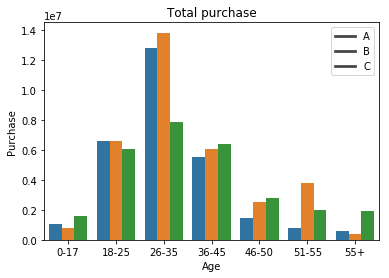

In [11]:
# age & city category & purches
df = new_dataset.groupby(['Age','City_Category'], as_index=False).agg({'Purchase':np.sum})
sns.barplot('Age','Purchase',hue='City_Category',data=df)
plt.title('Total purchase')
plt.legend(['A','B','C'],frameon=True)
plt.show()

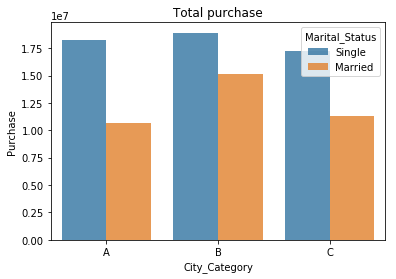

In [12]:
# city category & purches
df= new_dataset.groupby(['City_Category','Marital_Status'], as_index=False).agg({'Purchase':np.sum})
df['Marital_Status']=np.where(df['Marital_Status'] == 0,'Single','Married')
sns.barplot('City_Category','Purchase',hue='Marital_Status',data=df,alpha = 0.8)
plt.title('Total purchase')
plt.show()

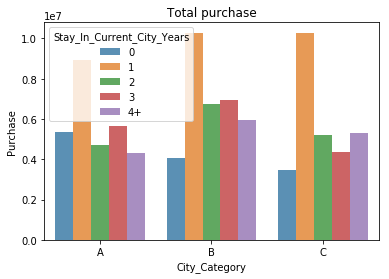

In [13]:
# city category & stay in city tears & purches
df = new_dataset.groupby(['City_Category','Stay_In_Current_City_Years'], as_index=False).agg({'Purchase':np.sum})
sns.barplot('City_Category','Purchase',hue='Stay_In_Current_City_Years',data=df,alpha = 0.8)
plt.title('Total purchase')
plt.show()

In [14]:
view_df=new_dataset.groupby( [ "Age", "Product_Category_1"] ).agg({'Purchase':'count'})
view_df

Purchase
Age   Product_Category_1          
0-17  1                         93
      2                         20
      3                         26
      4                         20
      5                        109
      6                          8
      8                         49
      10                         7
      11                        20
      12                         4
      13                         3
      14                         1
      15                         5
      16                        10
      17                         1
      18                         2
18-25 1                        581
      2                         96
      3                        103
      4                         50
      5                        616
      6                         90
      7                          7
      8                        385
      10                        12
      11                        95
      12                        14
      13                        13
      14                         4
      15                        17
...                            ...
51-55 6                         22
      7                          4
      8                        177
      9                          1
      10                         8
      11                        24
      12                         9
      13                        14
      14                         4
      15                        12
      16                         3
      17                         5
      18                         7
55+   1                         55
      2                          6
      3                          6
      4                          4
      5                         98
      6                         10
      7                          4
      8                        108
      10                         2
      11                        14
      12                         5
      13                         1
      14                         1
      15                         3
      16                         4
      17                         1
      18                         3

[120 rows x 1 columns]

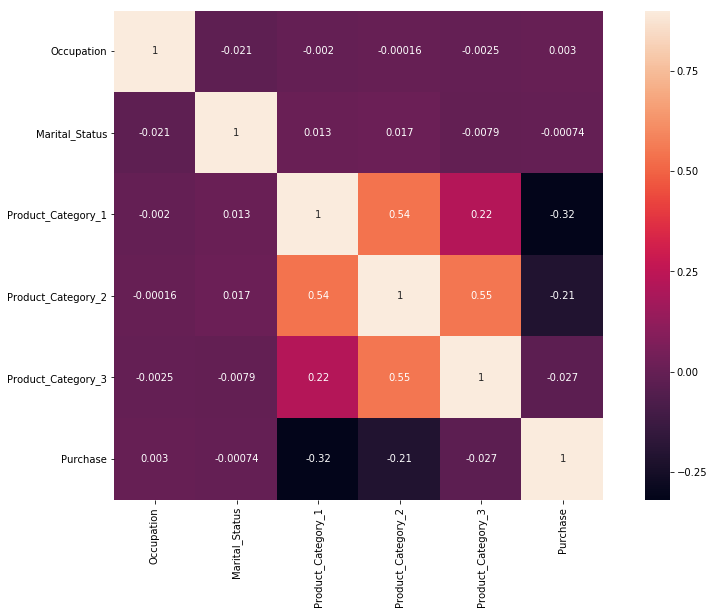

In [15]:
plt.figure(figsize=(15,9)) 
sns.heatmap(new_dataset.corr(), vmax=0.9,annot=True, square=True)

In [16]:
print(new_dataset.iloc[:, 9:11].skew())

Purchase    0.650394
dtype: float64


C:\Users\lenov\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


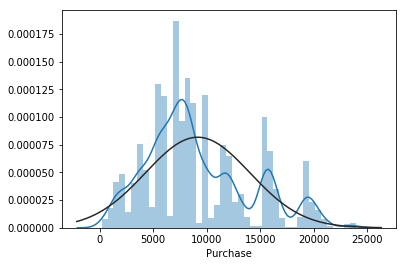

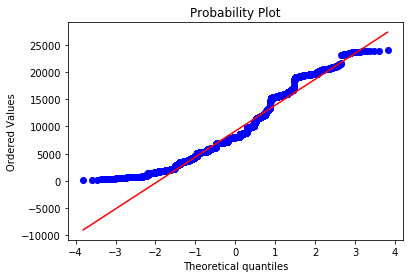

In [17]:

# to check normalization of target 
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(new_dataset['Purchase'] , fit=norm);
(mu, sigma) = norm.fit(new_dataset['Purchase'])
fig = plt.figure()
res = stats.probplot(new_dataset['Purchase'], plot=plt)
plt.show()

In [18]:
#check for nan
print(new_dataset.isnull().sum())

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            3243
Product_Category_3            7003
Purchase                         0
dtype: int64


# 4/ preprocessing

In [5]:
sns.distplot(new_dataset['Purchase'] , fit=norm);
(mu, sigma) = norm.fit(new_dataset['Purchase'])
fig = plt.figure()
res = stats.probplot(new_dataset['Purchase'], plot=plt)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
# to normalize the output 
from scipy.stats import boxcox
new_dataset['Purchase'], lam = boxcox(new_dataset['Purchase'])
print('Lambda: %f' % lam)

In [6]:
# column 7,8 ' Product_Category_2 , Product_Category_3'
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(new_dataset.iloc[:, 7:9])
new_dataset.iloc[:, 7:9] = imputer.transform(new_dataset.iloc[:, 7:9])
print(new_dataset.iloc[:, 7:9])

      Product_Category_2  Product_Category_3
0               9.796359           12.811144
1               6.000000           14.000000
2               9.796359           12.811144
3              14.000000           12.811144
4               9.796359           12.811144
5               2.000000           12.811144
6               8.000000           17.000000
7              15.000000           12.811144
8              16.000000           12.811144
9               9.796359           12.811144
10             11.000000           12.811144
11              9.796359           12.811144
12              9.796359           12.811144
13              2.000000            5.000000
14              8.000000           14.000000
15              5.000000           12.811144
16              3.000000            4.000000
17             14.000000           12.811144
18             14.000000           16.000000
19              5.000000           15.000000
20             14.000000           12.811144
21        

In [7]:
#check for nan
print(new_dataset.isnull().sum())

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [8]:
# column=1 , 'Age'
dict={'Age':{'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51:55':5,'55+':6}}
columns=new_dataset['Age'].astype('category').cat.categories.tolist()
map={'Age':{k:v for k,v in zip (columns,list(range(1,len(columns)+1)))}}
print(map)
new_dataset=new_dataset.copy()
new_dataset.replace(map, inplace=True)
print(new_dataset.head())

{'Age': {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}}
  Gender  Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F    1          10             A                          2   
1      F    1          10             A                          2   
2      F    1          10             A                          2   
3      F    1          10             A                          2   
4      M    7          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3            9.796359           12.811144   
1               0                   1            6.000000           14.000000   
2               0                  12            9.796359           12.811144   
3               0                  12           14.000000           12.811144   
4               0                   8            9.796359           12.811144   

 

In [9]:
dummy = pd.get_dummies(new_dataset['Gender'])
new_dataset = pd.concat([new_dataset,dummy],axis=1)
new_dataset.drop(['Gender'], axis=1,inplace = True)
print(new_dataset)

      Age  Occupation City_Category Stay_In_Current_City_Years  \
0       1          10             A                          2   
1       1          10             A                          2   
2       1          10             A                          2   
3       1          10             A                          2   
4       7          16             C                         4+   
5       3          15             A                          3   
6       5           7             B                          2   
7       5           7             B                          2   
8       5           7             B                          2   
9       3          20             A                          1   
10      3          20             A                          1   
11      3          20             A                          1   
12      3          20             A                          1   
13      3          20             A                          1   
14      6 

In [10]:
Dummy_variable=pd.get_dummies(new_dataset['City_Category'],  prefix='City_Category')

new_dataset = pd.concat([new_dataset, Dummy_variable], axis=1)
# Drop the previous rank column
new_dataset= new_dataset.drop('City_Category', axis=1)
print(new_dataset)


      Age  Occupation Stay_In_Current_City_Years  Marital_Status  \
0       1          10                          2               0   
1       1          10                          2               0   
2       1          10                          2               0   
3       1          10                          2               0   
4       7          16                         4+               0   
5       3          15                          3               0   
6       5           7                          2               1   
7       5           7                          2               1   
8       5           7                          2               1   
9       3          20                          1               1   
10      3          20                          1               1   
11      3          20                          1               1   
12      3          20                          1               1   
13      3          20                          1

In [11]:
# column=2 , 'Stay_In_Current_City_Years'
dict={'Stay_In_Current_City_Years':{'0':0,'1':1,'2':2,'3':3,' 4+':4}}
columns=new_dataset['Stay_In_Current_City_Years'].astype('category').cat.categories.tolist()
map={'Stay_In_Current_City_Years':{k:v for k,v in zip (columns,list(range(1,len(columns)+1)))}}
print(map)
new_dataset=new_dataset.copy()
new_dataset.replace(map, inplace=True)
print(new_dataset.head())

{'Stay_In_Current_City_Years': {'0': 1, '1': 2, '2': 3, '3': 4, '4+': 5}}
   Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0    1          10                           3               0   
1    1          10                           3               0   
2    1          10                           3               0   
3    1          10                           3               0   
4    7          16                           5               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  F  M  \
0                   3            9.796359           12.811144      8370  1  0   
1                   1            6.000000           14.000000     15200  1  0   
2                  12            9.796359           12.811144      1422  1  0   
3                  12           14.000000           12.811144      1057  1  0   
4                   8            9.796359           12.811144      7969  0  1   

   City_Category_A  City_Category_B  City_

# 3/ Splitting Data

In [12]:
features=new_dataset.drop('Purchase' , axis=1)
target=new_dataset["Purchase"]
target=target.astype('int')

print(features[:5])
print('************')
print(target[:5])
features.shape,target.shape

   Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0    1          10                           3               0   
1    1          10                           3               0   
2    1          10                           3               0   
3    1          10                           3               0   
4    7          16                           5               0   

   Product_Category_1  Product_Category_2  Product_Category_3  F  M  \
0                   3            9.796359           12.811144  1  0   
1                   1            6.000000           14.000000  1  0   
2                  12            9.796359           12.811144  1  0   
3                  12           14.000000           12.811144  1  0   
4                   8            9.796359           12.811144  0  1   

   City_Category_A  City_Category_B  City_Category_C  
0                1                0                0  
1                1                0                0  
2          

((10000, 12), (10000,))

# test & train

In [28]:
# cross validation 
from sklearn import cross_validation
from sklearn.cross_validation import KFold, cross_val_score
featuer_train, featuer_test, target_train, target_test = cross_validation.train_test_split(features, target,\
                                                              test_size=0.4,random_state=43)

k_fold = KFold(len(target), n_folds=10, shuffle=True,random_state=10)

C:\Users\lenov\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 4/ Regression  model

In [38]:
# 1-RandomForest Model +Evaluation
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit( featuer_train, target_train)
predict = cross_validation.cross_val_predict(model,  featuer_test, target_test,cv=10)
'''
score_1 =  cross_validation.cross_val_score(model, featuer_test, target_test, cv=10)
print(score_1)
'''

from sklearn.metrics import mean_squared_error
score_2=mean_squared_error(target_test, predict)
print('RMSE :',score_2)

print('**************')


from math import sqrt
score_3 = sqrt(abs(cross_val_score(RandomForestRegressor(), features, target, cv= k_fold ,scoring='neg_mean_squared_error').mean()))
print('mean square ERROR:',score_3)
print('**************')

RMSE : 1001.4755192097427
**************
mean square ERROR: 30.6381774094206
**************


In [39]:
#1- optimization 
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[60,120,140], 'max_depth':[6,7,8]}
GS = GridSearchCV(estimator = model , param_grid = parameters,scoring = 'neg_mean_squared_error' )
grid_fit = GS.fit( features, target)
best_grid= grid_fit.best_estimator_
score = grid_fit.best_score_

print('Best parameter: {}'.format(best_grid))
print('Best score: {:.2f}'.format(sqrt(abs(score))))

Best parameter: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Best score: 28.84


In [33]:
#2- Decision Tree model 
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit( featuer_train, target_train)
predict = cross_validation.cross_val_predict(model,  featuer_test, target_test,cv=10)

'''
score_1 =  cross_validation.cross_val_score(model, featuer_test, target_test, cv=10)
print(score_1)
'''

from sklearn.metrics import mean_squared_error
score_2=mean_squared_error(target_test, predict)
print('RMSE :',score_2)

print('**************')

from math import sqrt
score_3 = sqrt(abs(cross_val_score(DecisionTreeRegressor(), features, target, cv= k_fold ,scoring='neg_mean_squared_error').mean()))
print('mean square ERROR:',score_3)


RMSE : 1584.2568894525937
**************
mean square ERROR: 38.12207315419971


In [42]:
 #2- decision tress optimization  
parameters = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
GS = GridSearchCV(estimator =DecisionTreeRegressor(), param_grid = parameters,scoring = 'neg_mean_squared_error' )
grid_fit = GS.fit( features, target)
best_grid= grid_fit.best_estimator_
score = grid_fit.best_score_
print('Best parameter: {}'.format(best_grid))
print('Best score: {:.2f}'.format(sqrt(abs(score))))

Best parameter: DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=190, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Best score: 29.07


In [43]:
#3- linearRegression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit( featuer_train, target_train)
predict = cross_validation.cross_val_predict(model,  featuer_test, target_test,cv=10)

print('**************')

score_2=mean_squared_error(target_test, predict)
print('RMSE :',score_2)

score_3 = sqrt(abs(cross_val_score(model, features, target, cv=k_fold,scoring='neg_mean_squared_error').mean()))
print('mean square ERROR:',score_3)

**************
RMSE : 1937.3521087430797
mean square ERROR: 44.14604062732925


In [44]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
GS = GridSearchCV(estimator = LinearRegression() , param_grid = parameters,scoring = 'neg_mean_squared_error' )
grid_fit = GS.fit( features, target)
best_grid= grid_fit.best_estimator_
score = grid_fit.best_score_
print('Best parameter: {}'.format(best_grid))
print('Best score: {:.2f}'.format(sqrt(abs(score))))

Best parameter: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
Best score: 44.21


# 6/ Model Evaluation

In [45]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), features, target, cv=8,
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

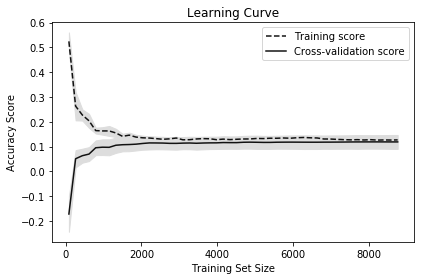

In [46]:


# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
                            